# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.ensemble import GradientBoostingRegressor

# Import Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample = pd.read_csv('./data/sample_submission.csv')

# Explore the Data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

In [4]:
for i in train.select_dtypes("object").columns:
    print (i , train[i].unique().tolist())

bin_3 ['T', 'F']
bin_4 ['Y', 'N']
nom_0 ['Green', 'Blue', 'Red']
nom_1 ['Triangle', 'Trapezoid', 'Polygon', 'Square', 'Star', 'Circle']
nom_2 ['Snake', 'Hamster', 'Lion', 'Cat', 'Dog', 'Axolotl']
nom_3 ['Finland', 'Russia', 'Canada', 'Costa Rica', 'China', 'India']
nom_4 ['Bassoon', 'Piano', 'Theremin', 'Oboe']
nom_5 ['50f116bcf', 'b3b4d25d0', '3263bdce5', 'f12246592', '5b0f5acd5', '46cab09da', 'be5592604', '72f8028dc', '4604905e7', 'ad95dc0ee', '2ff007c26', 'a35c346aa', 'dbfb714a4', 'e1558b071', '39647c92a', 'ee55b9d67', '416a8f3ab', '91bde92fa', '3aa9329e2', '568550f04', 'caf83c0b5', '908a1b9c9', 'e844a1f66', 'dbc448931', '2979f0d45', '96c73114c', 'b7bb45938', '7da3e4aec', 'be4578201', 'dc07effb0', '88917a066', 'f2d59cf51', '5d18641ff', '9347491f2', '475e79160', 'e70a6270d', '5b1a9f841', 'e0efe9d20', 'd1b1709e8', '9bb7ea2da', '6fec43dd8', '0dee9b39a', '527ded12a', '321bf770e', 'f7821e391', '0de4acd31', '185ba0a59', '4845cc770', 'bdb9fef4a', '3fef1a765', '2cc9e16b9', 'fd04a970f', '81f

In [5]:
for i in train.select_dtypes("object").columns:
    print (i , len(train[i].unique().tolist()))

bin_3 2
bin_4 2
nom_0 3
nom_1 6
nom_2 6
nom_3 6
nom_4 4
nom_5 222
nom_6 522
nom_7 1220
nom_8 2215
nom_9 11981
ord_1 5
ord_2 6
ord_3 15
ord_4 26
ord_5 192


In [6]:
for i in test.select_dtypes("object").columns:
    print (i , len(test[i].unique().tolist()))

bin_3 2
bin_4 2
nom_0 3
nom_1 6
nom_2 6
nom_3 6
nom_4 4
nom_5 222
nom_6 522
nom_7 1219
nom_8 2214
nom_9 11839
ord_1 5
ord_2 6
ord_3 15
ord_4 26
ord_5 192


<AxesSubplot: >

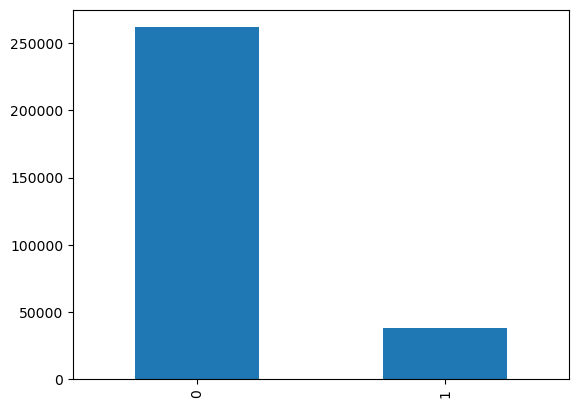

In [7]:
train['bin_0'].value_counts().plot.bar()

<AxesSubplot: >

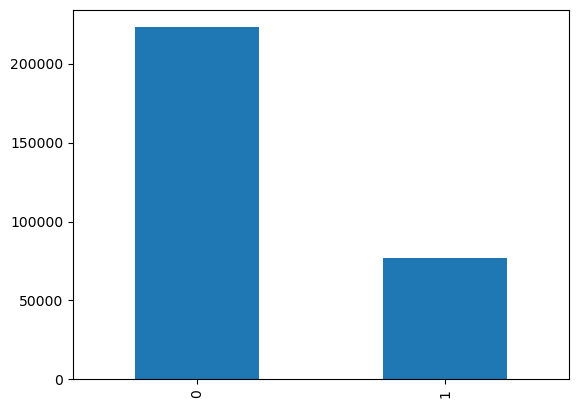

In [8]:
train['bin_1'].value_counts().plot.bar()

<AxesSubplot: >

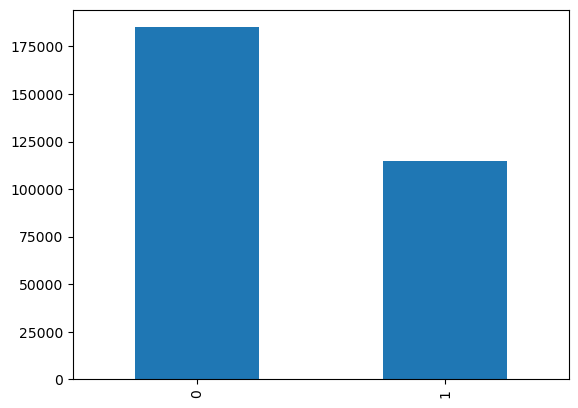

In [9]:
train['bin_2'].value_counts().plot.bar()

<AxesSubplot: >

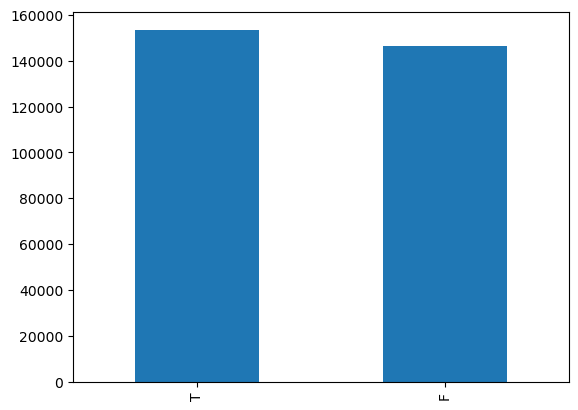

In [10]:
train['bin_3'].value_counts().plot.bar()

<AxesSubplot: >

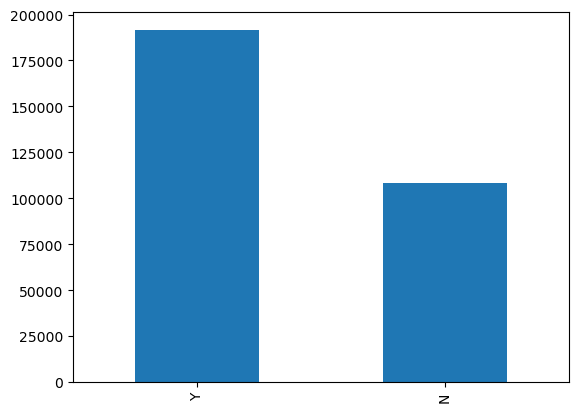

In [11]:
train['bin_4'].value_counts().plot.bar()

<AxesSubplot: >

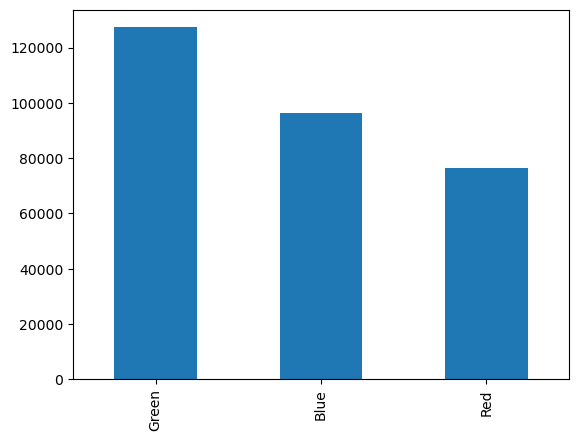

In [12]:
train['nom_0'].value_counts().plot.bar()

<AxesSubplot: >

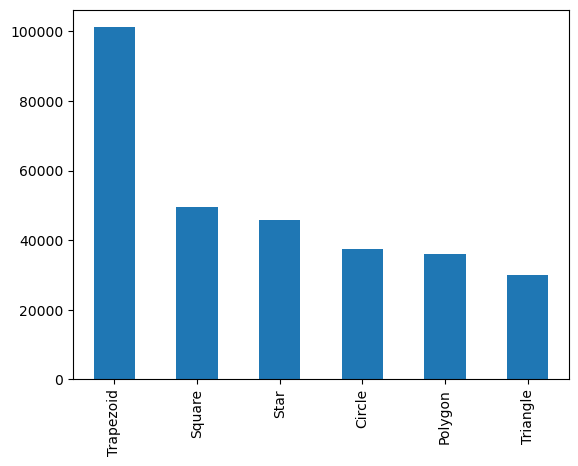

In [13]:
train['nom_1'].value_counts().plot.bar()

<AxesSubplot: >

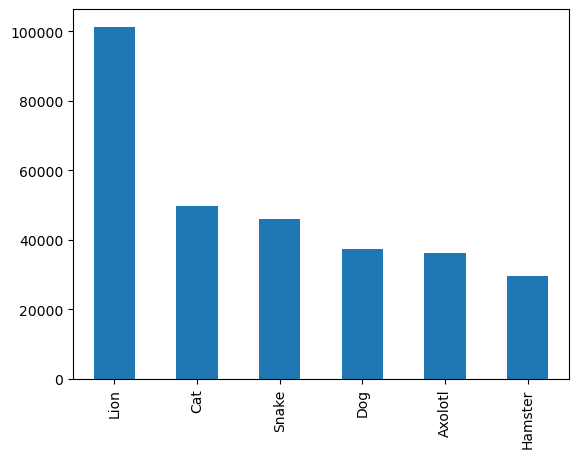

In [14]:
train['nom_2'].value_counts().plot.bar()

<AxesSubplot: >

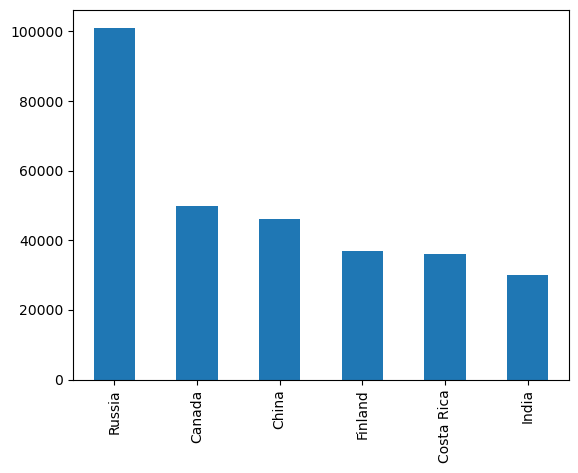

In [15]:
train['nom_3'].value_counts().plot.bar()

<AxesSubplot: >

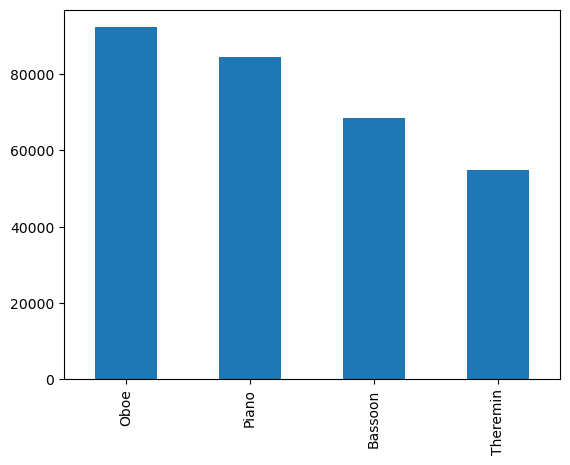

In [16]:
train['nom_4'].value_counts().plot.bar()

In [19]:
vc = train['nom_9'].value_counts()

In [20]:
len(vc[vc > 60].index.tolist())

36

In [21]:
len(vc[vc < 2].index.tolist())

239

In [22]:
train.nom_9.map(train.nom_9.value_counts())

0         19
1         13
2         29
3         44
4         35
          ..
299995    44
299996    36
299997    30
299998    25
299999    23
Name: nom_9, Length: 300000, dtype: int64

<AxesSubplot: >

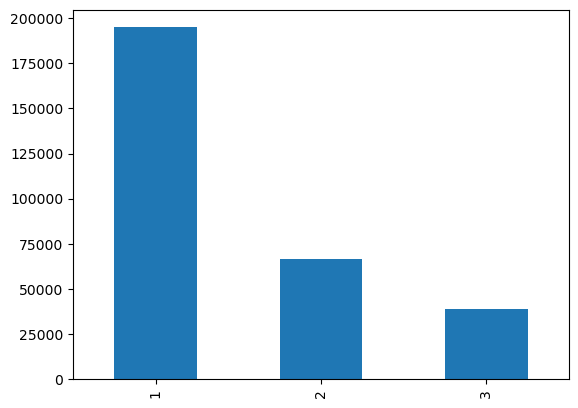

In [23]:
train['ord_0'].value_counts().plot.bar()

<AxesSubplot: >

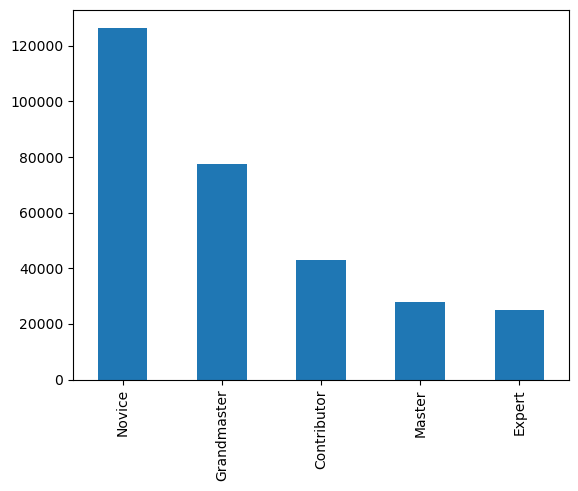

In [24]:
train['ord_1'].value_counts().plot.bar()

<AxesSubplot: >

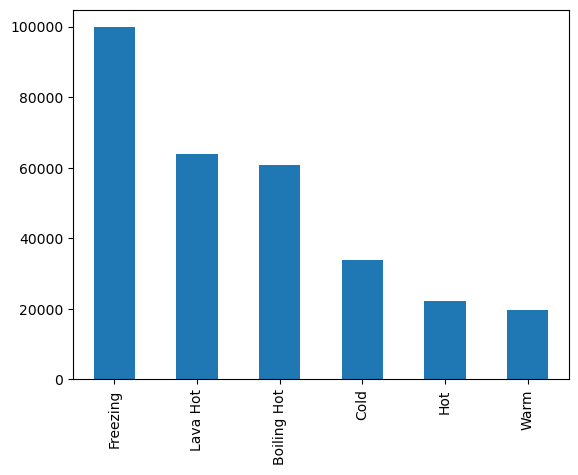

In [25]:
train['ord_2'].value_counts().plot.bar()

<AxesSubplot: >

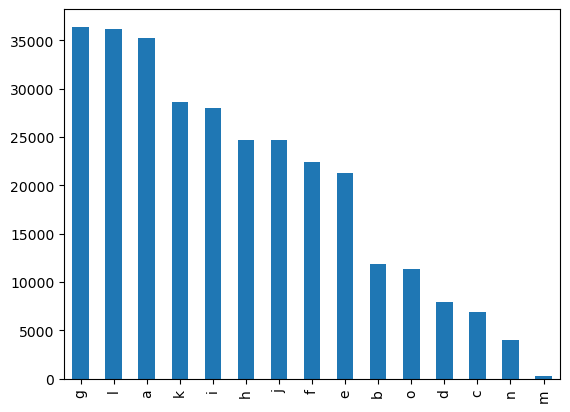

In [26]:
train['ord_3'].value_counts().plot.bar()

<AxesSubplot: >

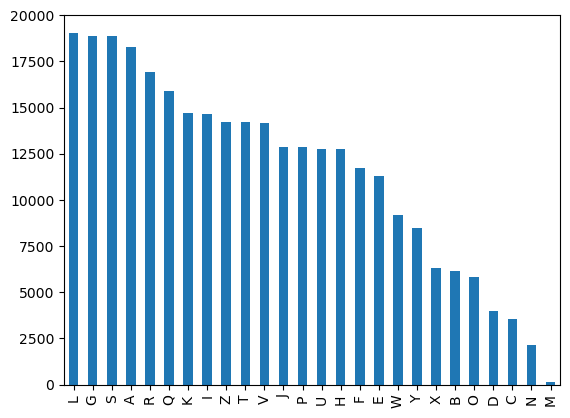

In [27]:
train['ord_4'].value_counts().plot.bar()

<AxesSubplot: >

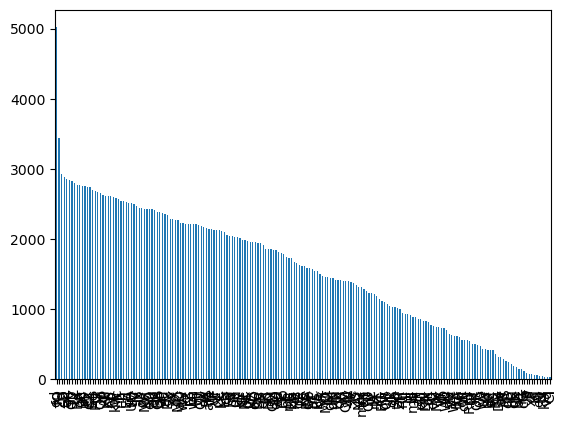

In [28]:
train['ord_5'].value_counts().plot.bar()

<AxesSubplot: >

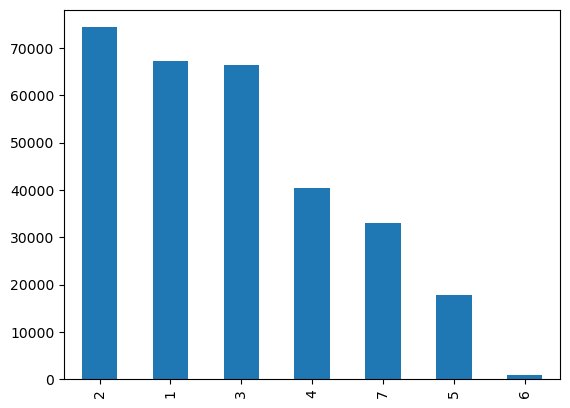

In [29]:
train['day'].value_counts().plot.bar()

<AxesSubplot: >

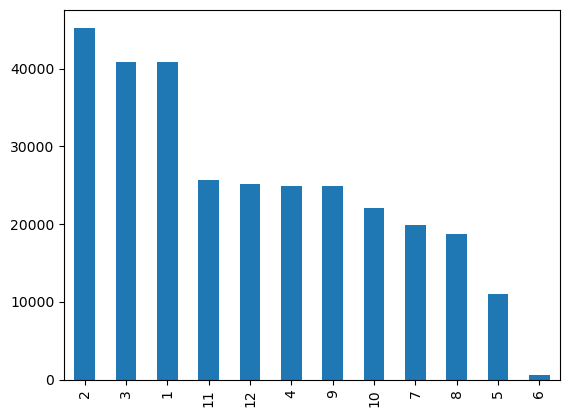

In [30]:
train['month'].value_counts().plot.bar()

In [31]:
train.nom_0.unique().tolist()

['Green', 'Blue', 'Red']

In [32]:
train.nom_1.unique().tolist()

['Triangle', 'Trapezoid', 'Polygon', 'Square', 'Star', 'Circle']

In [33]:
train.nom_2.unique().tolist()

['Snake', 'Hamster', 'Lion', 'Cat', 'Dog', 'Axolotl']

In [34]:
train.nom_3.unique().tolist()

['Finland', 'Russia', 'Canada', 'Costa Rica', 'China', 'India']

In [35]:
train.nom_4.unique().tolist()

['Bassoon', 'Piano', 'Theremin', 'Oboe']

In [36]:
len(train.nom_5.unique())

222

In [37]:
train.nom_6.unique()

len(train.nom_6.unique())

522

In [38]:
len(test.nom_6.unique())

522

In [65]:
train.nom_6 = train.nom_6.map(train.nom_6.value_counts())
test.nom_6 = test.nom_6.map(test.nom_6.value_counts())

In [39]:
train.nom_7.unique()

len(train.nom_7.unique())

1220

In [40]:
len(test.nom_7.unique())

1219

In [41]:
train.nom_7 = train.nom_7.map(train.nom_7.value_counts())

In [42]:
test.nom_7 = test.nom_7.map(test.nom_7.value_counts())

In [43]:
train.nom_8.unique()

len(train.nom_8.unique())

2215

In [44]:
len(test.nom_8.unique())

2214

In [45]:
train.nom_8 = train.nom_8.map(train.nom_8.value_counts())

In [46]:
test.nom_8 = test.nom_8.map(test.nom_8.value_counts())

In [47]:
train.nom_9.unique()

len(train.nom_9.unique())

11981

In [48]:
train.nom_9 = train.nom_9.map(train.nom_9.value_counts())

In [49]:
test.nom_9 = test.nom_9.map(test.nom_9.value_counts())

In [50]:
train.ord_0.unique().tolist()

[2, 1, 3]

In [51]:
train.ord_1.unique().tolist()

['Grandmaster', 'Expert', 'Novice', 'Contributor', 'Master']

In [52]:
train.ord_2.unique().tolist()

['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm']

In [53]:
train.ord_3.unique().tolist()

['h', 'a', 'i', 'j', 'g', 'e', 'd', 'b', 'k', 'f', 'l', 'n', 'o', 'c', 'm']

In [54]:
train.ord_4.unique().tolist()

['D',
 'A',
 'R',
 'E',
 'P',
 'K',
 'V',
 'Q',
 'Z',
 'L',
 'F',
 'T',
 'U',
 'S',
 'Y',
 'B',
 'H',
 'J',
 'N',
 'G',
 'W',
 'I',
 'O',
 'C',
 'X',
 'M']

In [55]:
train.ord_5.unique().tolist()

['kr',
 'bF',
 'Jc',
 'kW',
 'qP',
 'PZ',
 'wy',
 'Ed',
 'qo',
 'CZ',
 'qX',
 'su',
 'dP',
 'aP',
 'MV',
 'oC',
 'RL',
 'fh',
 'gJ',
 'Hj',
 'TR',
 'CL',
 'Sc',
 'eQ',
 'kC',
 'qK',
 'dh',
 'gM',
 'Jf',
 'fO',
 'Eg',
 'KZ',
 'Vx',
 'Fo',
 'sV',
 'eb',
 'YC',
 'RG',
 'Ye',
 'qA',
 'lL',
 'Qh',
 'Bd',
 'be',
 'hT',
 'lF',
 'nX',
 'kK',
 'av',
 'uS',
 'Jt',
 'PA',
 'Er',
 'Qb',
 'od',
 'ut',
 'Dx',
 'Xi',
 'on',
 'Dc',
 'sD',
 'rZ',
 'Uu',
 'sn',
 'yc',
 'Gb',
 'Kq',
 'dQ',
 'hp',
 'kL',
 'je',
 'CU',
 'Fd',
 'PQ',
 'Bn',
 'ex',
 'hh',
 'ac',
 'rp',
 'dE',
 'oG',
 'oK',
 'cp',
 'mm',
 'vK',
 'ek',
 'dO',
 'XI',
 'CM',
 'Vf',
 'aO',
 'qv',
 'jp',
 'Zq',
 'Qo',
 'DN',
 'TZ',
 'ke',
 'cG',
 'tP',
 'ud',
 'tv',
 'aM',
 'xy',
 'lx',
 'To',
 'uy',
 'ZS',
 'vy',
 'ZR',
 'AP',
 'GJ',
 'Wv',
 'ri',
 'qw',
 'Xh',
 'FI',
 'nh',
 'KR',
 'dB',
 'BE',
 'Bb',
 'mc',
 'MC',
 'tM',
 'NV',
 'ih',
 'IK',
 'Ob',
 'RP',
 'dN',
 'us',
 'dZ',
 'yN',
 'Nf',
 'QM',
 'jV',
 'sY',
 'wu',
 'SB',
 'UO',
 'Mx',
 'JX',

# Corrections to the data

In [56]:
train.bin_3.replace({'T':1 , 'F': 0}, inplace=True)

In [57]:
test.bin_3.replace({'T':1 , 'F': 0}, inplace=True)

In [58]:
train.bin_4.replace({'Y':1 , 'N': 0}, inplace=True)

In [59]:
test.bin_4.replace({'Y':1 , 'N': 0}, inplace=True)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  int64 
 5   bin_4   300000 non-null  int64 
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  int64 
 14  nom_8   300000 non-null  int64 
 15  nom_9   300000 non-null  int64 
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      200000 non-null  int64 
 1   bin_0   200000 non-null  int64 
 2   bin_1   200000 non-null  int64 
 3   bin_2   200000 non-null  int64 
 4   bin_3   200000 non-null  int64 
 5   bin_4   200000 non-null  int64 
 6   nom_0   200000 non-null  object
 7   nom_1   200000 non-null  object
 8   nom_2   200000 non-null  object
 9   nom_3   200000 non-null  object
 10  nom_4   200000 non-null  object
 11  nom_5   200000 non-null  object
 12  nom_6   200000 non-null  object
 13  nom_7   200000 non-null  int64 
 14  nom_8   200000 non-null  int64 
 15  nom_9   200000 non-null  int64 
 16  ord_0   200000 non-null  int64 
 17  ord_1   200000 non-null  object
 18  ord_2   200000 non-null  object
 19  ord_3   200000 non-null  object
 20  ord_4   200000 non-null  object
 21  ord_5   200000 non-null  object
 

In [62]:
train.day.unique().tolist()

[2, 7, 5, 4, 3, 1, 6]

In [63]:
train.month.unique().tolist()

[2, 8, 1, 4, 10, 3, 7, 9, 12, 11, 5, 6]

In [41]:
ord_train = train[["ord_0", "ord_1" , "ord_2" , "ord_3" , "ord_4" , "ord_5"]]

In [42]:
ord_test = test[["ord_0", "ord_1" , "ord_2" , "ord_3" , "ord_4" , "ord_5"]]

In [66]:
train.ord_1.unique().tolist()

['Grandmaster', 'Expert', 'Novice', 'Contributor', 'Master']

In [67]:
enc_ord1 = OrdinalEncoder(categories=[['Novice', 'Contributor' , 'Expert' , 'Master' , 'Grandmaster']])

In [68]:
enc_ord1.fit(train[["ord_1"]])

OrdinalEncoder(categories=[['Novice', 'Contributor', 'Expert', 'Master',
                            'Grandmaster']])

In [69]:
train["ord_1"] = enc_ord1.transform(train[['ord_1']])

In [70]:
enc_ord1.fit(test[["ord_1"]])
test["ord_1"] = enc_ord1.transform(test[['ord_1']])

In [71]:
train.ord_2.unique().tolist()

['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm']

In [72]:
enc_ord2 = OrdinalEncoder(categories=[['Freezing', 'Cold' , 'Warm' , 'Hot' , 'Boiling Hot' , 'Lava Hot']])

In [73]:
enc_ord2.fit(train[["ord_2"]])

OrdinalEncoder(categories=[['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot',
                            'Lava Hot']])

In [74]:
train["ord_2"] = enc_ord2.transform(train[['ord_2']])

In [75]:
enc_ord2.fit(test[["ord_2"]])
test["ord_2"] = enc_ord2.transform(test[['ord_2']])

In [76]:
enc_ord3 = OrdinalEncoder()

In [77]:
enc_ord3.fit(train[['ord_3']])

OrdinalEncoder()

In [78]:
train['ord_3'] = enc_ord3.transform(train[['ord_3']])

In [79]:
enc_ord3.fit(test[['ord_3']])
test['ord_3'] = enc_ord3.transform(test[['ord_3']])

In [80]:
enc_ord4 = OrdinalEncoder()

In [81]:
enc_ord4.fit(train[['ord_4']])

OrdinalEncoder()

In [82]:
train['ord_4'] = enc_ord4.transform(train[['ord_4']])

In [83]:
enc_ord4.fit(test[['ord_4']])
test['ord_4'] = enc_ord4.transform(test[['ord_4']])

In [84]:
enc_ord5 = OrdinalEncoder()

In [85]:
enc_ord5.fit(train[['ord_5']])

OrdinalEncoder()

In [86]:
train['ord_5'] = enc_ord5.transform(train[['ord_5']])

In [87]:
enc_ord5.fit(test[['ord_5']])
test['ord_5'] = enc_ord5.transform(test[['ord_5']])

In [64]:
train_new = pd.merge(train , nom_train_dummies, left_index=True, right_index=True)

In [65]:
test_new = pd.merge(test , nom_test_dummies, left_index=True, right_index=True)

In [66]:
train_new.describe()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,...,nom_7_fe7e29ba1,nom_7_fef807a3e,nom_7_ff1165b7a,nom_7_ff5b35098,nom_7_ff5db7584,nom_7_ff6b6817e,nom_7_ff8d529ff,nom_7_ffa3210ac,nom_7_ffe76496e,nom_7_ffec80a6a
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000
mean,149999.500000,0.127503,0.256607,0.383223,0.511783,0.638777,1.479567,1.622907,2.339350,6.609097,...,0.001563,0.00140,0.000943,0.001273,0.001087,0.00042,0.001247,0.001523,0.000610,0.001093
std,86602.684716,0.333537,0.436761,0.486173,0.499862,0.480356,0.712524,1.677608,2.031744,3.829374,...,0.039508,0.03739,0.030699,0.035661,0.032947,0.02049,0.035286,0.039000,0.024691,0.033048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,74999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,7.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,224999.250000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,10.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,299999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,5.000000,14.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [88]:
train_new = pd.get_dummies(train)

In [89]:
test_new = pd.get_dummies(test)

In [91]:
train_new.describe()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,...,nom_3_Canada,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Bassoon,nom_4_Oboe,nom_4_Piano,nom_4_Theremin
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,149999.500000,0.127503,0.256607,0.383223,0.511783,0.638777,1855.179467,774.759680,327.896940,180.698707,...,0.166503,0.15348,0.119960,0.123140,0.099840,0.337077,0.228160,0.307643,0.281723,0.182473
std,86602.684716,0.333537,0.436761,0.486173,0.499862,0.480356,695.026777,280.681191,116.381587,64.628926,...,0.372532,0.36045,0.324915,0.328598,0.299787,0.472712,0.419647,0.461519,0.449840,0.386235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,1.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1358.000000,567.000000,242.000000,134.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1986.000000,825.000000,346.000000,191.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,224999.250000,0.000000,1.000000,1.000000,1.000000,1.000000,2477.000000,1009.000000,422.000000,233.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,299999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2801.000000,1218.000000,534.000000,299.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
x = train_new.drop(['id' , 'target'], axis = 'columns')

In [93]:
y = train_new['target']

In [94]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [95]:
x.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,...,nom_3_Canada,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Bassoon,nom_4_Oboe,nom_4_Piano,nom_4_Theremin
0,0,0,0,1,1,2594,1148,241,271,19,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,1,1,792,842,287,111,13,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,1,2524,1169,475,278,29,...,0,0,0,0,0,1,0,0,0,1
3,0,1,0,0,1,975,1175,442,203,44,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,2010,1157,436,207,35,...,1,0,0,0,0,0,0,1,0,0


In [96]:
model = LogisticRegression(solver='lbfgs',random_state=0 , max_iter=5000)

In [97]:
model.fit(x,y)

LogisticRegression(max_iter=5000, random_state=0)

In [75]:
model.predict(x)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [98]:
model.score(x,y)

0.74265

In [99]:
test_x = test_new.drop(['id'], axis = 'columns')
ids = test_new['id']

In [100]:
result = model.predict(test_x)

In [101]:
result = pd.DataFrame(result, columns=['target'])

In [102]:
result1 = pd.merge(ids, result, left_index=True, right_index=True)
result1

,id,target
0,300000,0
1,300001,0
2,300002,0
3,300003,0
4,300004,1
...,...,...
199995,499995,0
199996,499996,0
199997,499997,0
199998,499998,0


In [103]:
result1.to_csv('./data/submission.csv', index=False)

#RandomForrestClassifier

In [104]:
mod1 = RandomForestClassifier(n_estimators=1000,
 criterion = "gini",random_state=42, n_jobs = -1 )

In [105]:
mod1.fit(x,y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [107]:
result = mod1.predict(test_x)

In [106]:
mod1.score(x,y)

1.0

In [108]:
result = pd.DataFrame(result, columns=['target'])

In [109]:
result1 = pd.merge(ids, result, left_index=True, right_index=True)
result1

,id,target
0,300000,0
1,300001,0
2,300002,0
3,300003,0
4,300004,1
...,...,...
199995,499995,0
199996,499996,0
199997,499997,0
199998,499998,0


In [110]:

result1.to_csv('./data/submission_RF.csv', index=False)